UnboundLocalError: local variable 'm' referenced before assignment

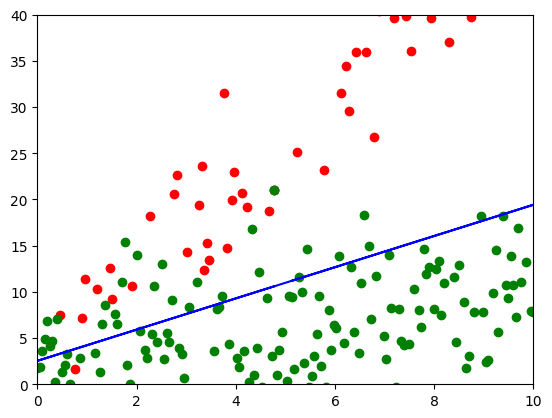

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate random data for demonstration
np.random.seed(42)
x_data = np.linspace(0, 10, 200)
np.random.shuffle(x_data)
y_data_a = 5 * x_data[:50] + np.random.randn(50) * 5
y_data_b = 1 * x_data[50:] + np.random.randn(150) * 5
y_data = np.concatenate((y_data_a, y_data_b))

# Initialize figure and axes
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 40)

# Initialize empty scatter plot and regression line
scatter = ax.scatter([], [], color='red', label='First 50 points')
scatter2 = ax.scatter([], [], color='green', label='Remaining points')
line, = ax.plot([], [], color='blue')

# Initialize variables
x_points = []
y_points = []
m = 0
b = 0

# Update function to be called in each animation frame
def update(frame):
    if frame < len(x_data):
        x_points.append(x_data[frame])
        y_points.append(y_data[frame])

        # Perform linear regression on current points
        x = np.array(x_points)
        y = np.array(y_points)
        A = np.vstack([x, np.ones(len(x))]).T
        m, b = np.linalg.lstsq(A, y, rcond=None)[0]

    # Update scatter plot and regression line
    scatter.set_offsets(np.column_stack([x_points[:50], y_points[:50]]))
    scatter2.set_offsets(np.column_stack([x_points[50:], y_points[50:]]))
    line.set_data(x_data, m * x_data + b)

# Create the animation
animation = FuncAnimation(fig, update, frames=len(x_data)+1, interval=300, repeat=False)

animation.save('linear_regression_animation_concept_drift.gif', writer='pillow', dpi=100)

# Display the plot
plt.show()


In [ ]:
# standard online linear regression

# Generate random data for demonstration
np.random.seed(42)
x_data = np.linspace(0, 10, 100)
y_data = 3 * x_data + 2 + np.random.randn(100) * 2

# Initialize figure and axes
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 40)

# Initialize empty scatter plot and regression line
scatter = ax.scatter([], [], color='red')
line, = ax.plot([], [], color='blue')

# Initialize variables
x_points = []
y_points = []
m = 0
b = 0

# Update function to be called in each animation frame
def update(frame):
    if frame < len(x_data):
        x_points.append(x_data[frame])
        y_points.append(y_data[frame])

        # Perform linear regression on current points
        x = np.array(x_points)
        y = np.array(y_points)
        A = np.vstack([x, np.ones(len(x))]).T
        m, b = np.linalg.lstsq(A, y, rcond=None)[0]

    # Update scatter plot and regression line
    scatter.set_offsets(np.column_stack([x_points, y_points]))
    line.set_data(x_data, m * x_data + b)

# Create the animation
animation = FuncAnimation(fig, update, frames=len(x_data)+1, interval=100, repeat=False)
animation.save('linear_regression_animation.gif', writer='pillow', dpi=100)

# Display the plot
plt.show()
